In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets

In [2]:
df = pd.read_csv(r"C:\Users\Shrushti\Desktop\datasets excel\AAPL Historical Data.csv")

In [3]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [4]:
df.describe()

,Price,Open,High,Low
count,10690.000000,10690.000000,10690.000000,10690.000000
mean,17.579477,17.567806,17.768518,17.373695
std,37.083022,37.047773,37.496595,36.627464
min,0.050000,0.050000,0.050000,0.050000
25%,0.290000,0.290000,0.300000,0.280000
50%,0.490000,0.490000,0.500000,0.490000
75%,17.395000,17.360000,17.575000,17.185000
max,182.010000,182.630000,182.940000,179.120000


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by date
df = df.sort_values(by='Date')

# Calculate the change in price over time
initial_price = df['Price'].iloc[0]
final_price = df['Price'].iloc[-1]
price_change = final_price - initial_price

print(f"The change in stock price over time is: {price_change}")

The change in stock price over time is: 173.44


In [8]:
df['Vol.'] = pd.to_numeric(df['Vol.'].str.replace('B', 'e9').str.replace('M', 'e6'), errors='coerce')


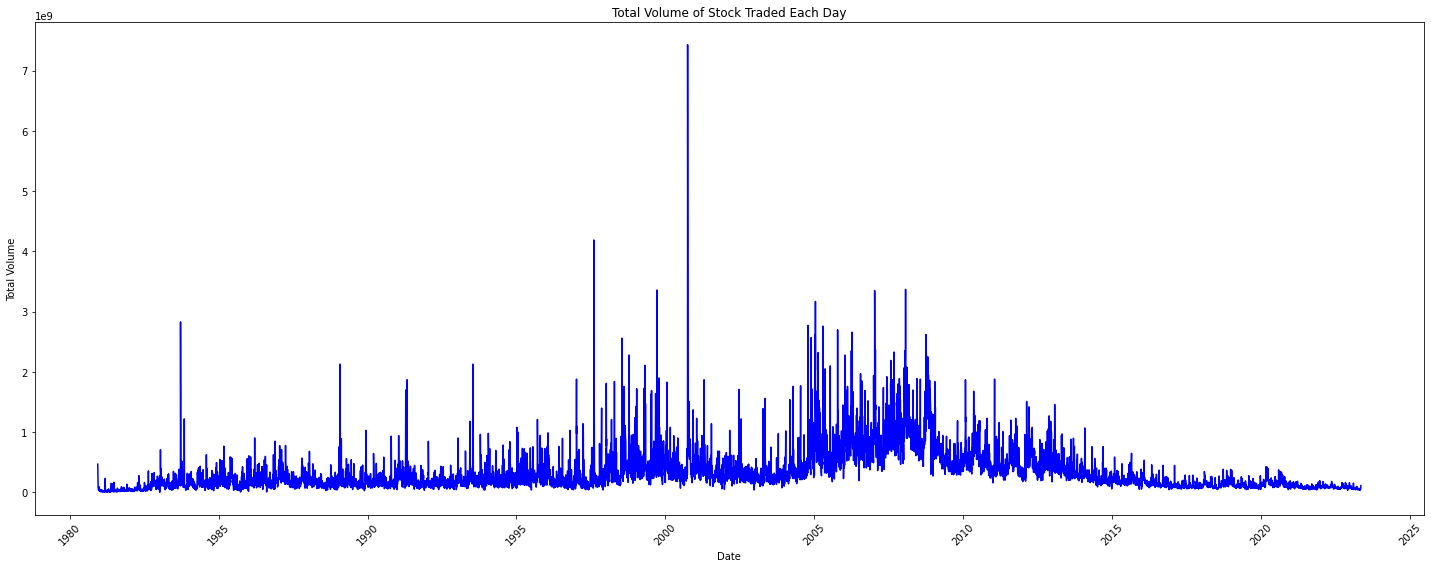

In [12]:
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Vol.'], linestyle='-', color='blue')
plt.title('Total Volume of Stock Traded Each Day')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

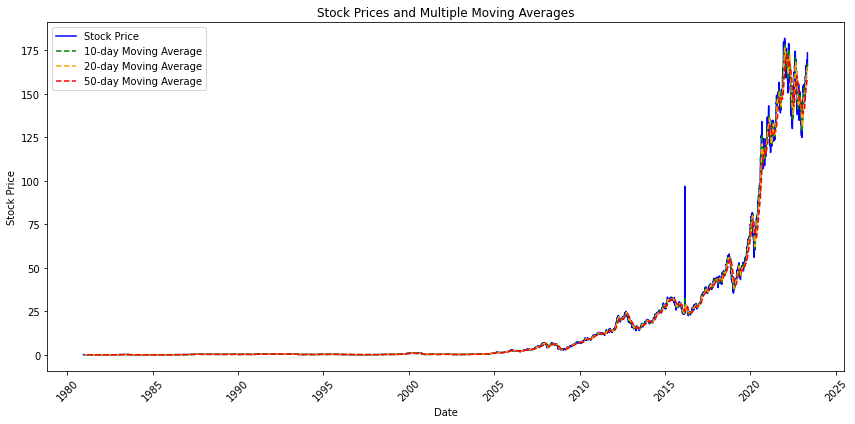

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date
df.sort_values(by='Date', inplace=True)

# Calculate moving averages for 10, 20, and 50 days
df['10_MA'] = df['Price'].rolling(window=10).mean()
df['20_MA'] = df['Price'].rolling(window=20).mean()
df['50_MA'] = df['Price'].rolling(window=50).mean()

# Plotting the stock prices and multiple moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Stock Price', color='blue')
plt.plot(df['Date'], df['10_MA'], label='10-day Moving Average', color='green', linestyle='--')
plt.plot(df['Date'], df['20_MA'], label='20-day Moving Average', color='orange', linestyle='--')
plt.plot(df['Date'], df['50_MA'], label='50-day Moving Average', color='red', linestyle='--')

plt.title('Stock Prices and Multiple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

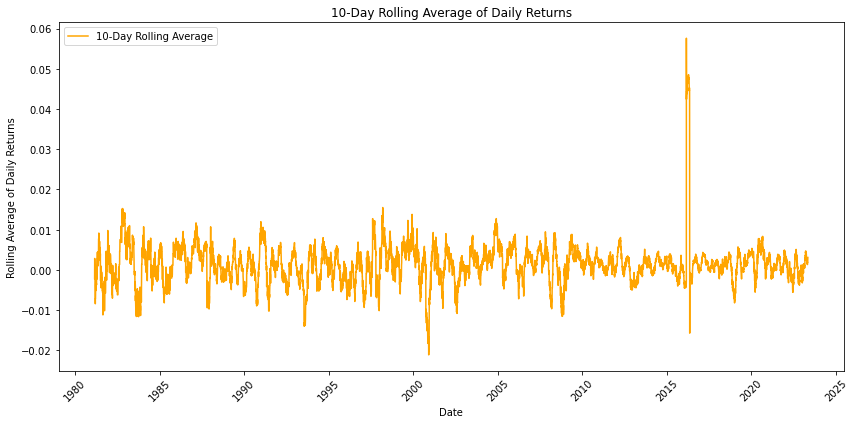

In [22]:
# Sort DataFrame by date
df.sort_values(by='Date', inplace=True)

# Calculate daily returns
df['Daily_Return'] = df['Price'].pct_change()

# Calculate the rolling average of daily returns
rolling_average = df['Daily_Return'].rolling(window=50).mean()  # You can adjust the window size as needed

# Plotting the rolling average of daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], rolling_average, label='10-Day Rolling Average', color='orange')
plt.title('10-Day Rolling Average of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Rolling Average of Daily Returns')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
#did rolling average because more values


In [29]:
daily_returns = df['Daily_Return']

# Calculate the standard deviation (volatility) of daily returns
volatility = daily_returns.std()

# Calculate the annualized volatility (assuming 252 trading days in a year)
annualized_volatility = volatility * np.sqrt(252)

print(f"The daily volatility is: {volatility:.4f}")
print(f"The annualized volatility is: {annualized_volatility:.4f}")

The daily volatility is: 0.0438
The annualized volatility is: 0.6950


Mean Squared Error: 0.07651131555491061


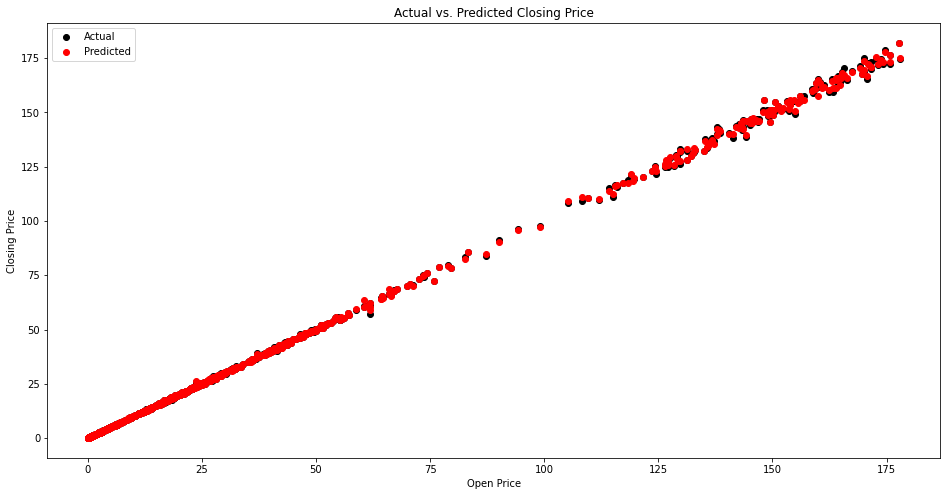

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns including 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'

# Feature engineering: Extracting relevant features
features = df[['Open', 'High', 'Low']]  # Considered features: 'Open', 'High', 'Low'

# Target variable
target = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize predictions vs. actual values
plt.figure(figsize=(16, 8))
plt.scatter(X_test['Open'], y_test, color='black', label='Actual')
plt.scatter(X_test['Open'], predictions, color='red', label='Predicted')
plt.legend()
plt.xlabel('Open Price')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Price')
plt.show()